**Introduction** <br>
Evaluation is needed for the current MSPA curriculum and how students feel about the program. The questions range from software and language preferences to interest in current and future courses. The objective of the course catalog is to provide students with a high level of return and prepare them for a career in Predictive Analytics or MSDS. Management would like to assess if changes are needed in the language and course offerings with this in mind.

In [1]:
#GIVEN
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls

import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
#GIVEN
# read in comma-delimited text file, creating a pandas DataFrame object
valid_survey_input = pd.read_csv('C:\\Users\\asidd\\Desktop\\MSDS\\422 ML\\mspa-software-survey-case-python-v005\\mspa-software-survey-case-python-v005\\mspa-survey-data.csv')

In [3]:
#GIVEN 
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

**Examine the structure of the DataFrame object and clean the data**

In [4]:
#GIVEN 
# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 
print('\ndata shape:', valid_survey_input.shape)


Contents of initial survey data ---------------

Number of Respondents = 207

data shape: (207, 40)


In [5]:
#GIVEN 
# show the column/variable names of the Data Frame
# note that RespondentID is no longer present
print('\ndata columns:',valid_survey_input.columns)


data columns: Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [6]:
#GIVEN 
# abbreviated printing of the first five rows of the data frame
print('\nfirst five rows of the data frame:')
## removed it to fit the analysis into 12 page Adobe print-out 
## valid_survey_input.head() 


first five rows of the data frame:


In [7]:
# frequency table of graduate dates 
valid_survey_input['Graduate_Date'].value_counts().sort_values(ascending = False)

Spring 2018      30
Winter 2018      25
Winter 2017      25
Fall 2018        20
Spring 2017      19
Summer 2017      14
Fall 2017        14
Fall 2016        13
Summer 2018      11
Winter 2019      11
Spring 2019       9
2020 or Later     5
Fall 2019         5
Summer 2019       3
Name: Graduate_Date, dtype: int64

The survey was conducted in 2016 and there were 207 respondents, who were current students in the MSPA program. Their graduation date ranges from 2016 to 2020 or later. The survey asked 15 questions in total, and questions related to the course or language preferences allowed for a sliding scale response with a max of 100. The majority of the respondents planned to graduate in 2017 or 2018. The research focused on five languages and they are Python, R, SAS, Java, and JS.

In [8]:
# converting values of columns 'PREDICT400':'OtherSAS' to dummy variables by using pd.get_dummies
# merging back dummy variables by using pd.merge function
merge_df = pd.merge(
        pd.merge(valid_survey_input.loc[:,'Personal_JavaScalaSpark':'Courses_Completed'], 
                pd.get_dummies(valid_survey_input.loc[:,'PREDICT400':'OtherSAS']),
                right_index=True, left_index=True),
        valid_survey_input.loc[:,'Other':'Graduate_Date'],
        right_index=True, left_index=True)
## merge_df.head()

In [9]:
# splitting graduate date columns into academic quarters and year

# new data frame with split value columns 
split_gd  = merge_df['Graduate_Date'].str.split(" ", expand = True) 
  
# making separate graduate quarter column from new data frame 
merge_df["Graduate_Quarter"]= split_gd [0] 
  
# making separate graduate year column from new data frame 
merge_df["Graduate_Year"]= split_gd [1] 

In [10]:
#PARTIALLY GIVEN
# shorten the variable/column names
df = merge_df.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'Pers_Java',
    'Personal_JavaScriptHTMLCSS': 'Pers_JS',
    'Personal_Python': 'Pers_Python',
    'Personal_R': 'Pers_R',
    'Personal_SAS': 'Pers_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'PREDICT400_PREDICT 400 Math for Modelers (Python)': 'P400_Python',
    'PREDICT401_PREDICT 401 Introduction to Statistical Analysis (R)': 'P401_R',
    'PREDICT410_PREDICT 410 Regression and Multivariate Analysis (SAS)': 'P410_SAS',
    'PREDICT411_PREDICT 411 Generalized Linear Models (SAS)': 'P411_SAS',
    'PREDICT413_PREDICT 413 Time Series Analysis and Forecasting (R)': 'P413_R',
    'PREDICT420_PREDICT 420 Database Systems and Data Preparation (Python)': 'P420_Python',
    'PREDICT422_PREDICT 422 Practical Machine Learning (R)': 'P422_R',
    'PREDICT450_PREDICT 450 Marketing Analytics (R)': 'P450_R',
    'PREDICT451_PREDICT 451 Risk Analytics (R)': 'P451_R',
    'PREDICT452_PREDICT 452 Web Analytics and Network Data Science (Python)': 'P452_Python',
    'PREDICT453_PREDICT 453 Text Analytics (Python)': 'P453_Python',
    'PREDICT454_PREDICT 454 Advanced Modeling Techniques (R)': 'P454_R',
    'PREDICT455_PREDICT 455 Data Visualization (R)': 'P455_R',
    'PREDICT456_PREDICT 456 Sports Performance Analytics (R)': 'P456_R',
    'PREDICT457_PREDICT 457 Sports Management Analytics (R)': 'P457_R',
    'OtherPython_Other Course with Python as the Primary Language': 'Other_Python',
    'OtherR_Other Course with R as the Primary Language': 'Other_R',
    'OtherSAS_Other Course with SAS as the Primary Language': 'Other_SAS',})
df = df.drop('Other', axis=1)

Longer columns were renamed for a cleaner display. Free text column such as ‘Other’ was omitted from the focused data frames.

In [11]:
# show the data types of the Data Frame and check missing values

print(pd.concat([df.dtypes.rename('data types'), 
                 df.isnull().sum().rename('missing values')], axis=1))
## df.head()

                                 data types  missing values
Pers_Java                             int64               0
Pers_JS                               int64               0
Pers_Python                           int64               0
Pers_R                                int64               0
Pers_SAS                              int64               0
Prof_Java                             int64               0
Prof_JS                               int64               0
Prof_Python                           int64               0
Prof_R                                int64               0
Prof_SAS                              int64               0
Ind_Java                              int64               0
Ind_JS                                int64               0
Ind_Python                            int64               0
Ind_R                                 int64               0
Ind_SAS                               int64               0
Python_Course_Interest              floa

In [12]:
#GIVEN
# define subset DataFrame for analysis of software preferences
software_df = df.loc[:, 'Pers_Java':'Ind_SAS']
survey_df = df.copy()
software_df.head()

,Pers_Java,Pers_JS,Pers_Python,Pers_R,Pers_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
RespondentID,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50
5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0
5132253300,20,0,40,40,0,0,0,40,40,20,30,0,30,40,0
5132096630,10,10,25,35,20,10,10,25,35,20,10,10,25,35,20
5131990362,20,0,0,70,10,20,0,0,80,0,40,0,0,60,0


**Examine the data; descriptive statistics**

In [13]:
#GIVEN
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
software_df.describe()


Descriptive statistics for survey data ---------------


,Pers_Java,Pers_JS,Pers_Python,Pers_R,Pers_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000


In [14]:
#GIVEN
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
df['Courses_Completed'].describe()


Descriptive statistics for courses completed ---------------


count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64

<Figure size 432x288 with 0 Axes>

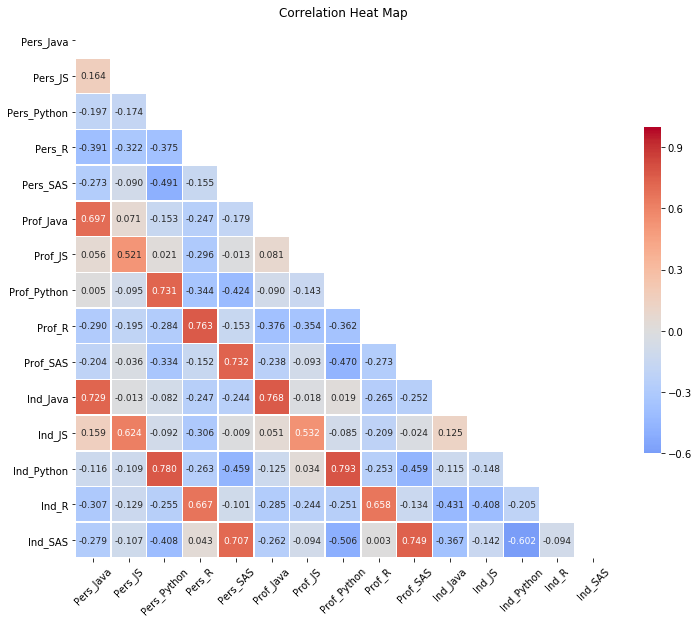

In [15]:
#GIVEN
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)    
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine intercorrelations among software preference variables with correlation matrix/heat map
corr_chart(df_corr = software_df)

# This tells us that people who lean towards a language in their personal, also tend to lean into it
# as a professional and industry language. Pers_Python is closely correlated (closest to one or red) with Ind_Python 
# and Prof_Python

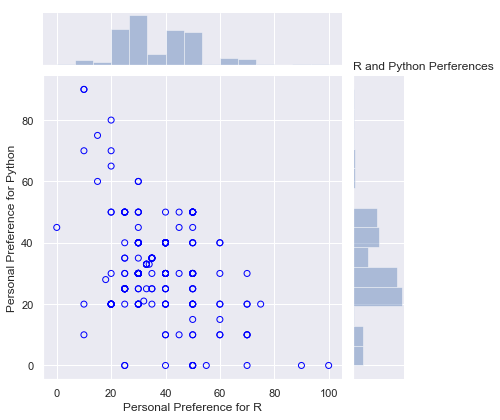

In [25]:
#PARTIALLY GIVEN
# single scatter plot example

h = sns.jointplot(x = 'Pers_R', y = 'Pers_Python', data = software_df, kind='scatter',
    facecolors = 'none',
    edgecolors = 'blue')
 
plt.title('R and Python Perferences', loc = 'left')
h.set_axis_labels('Personal Preference for R', 'Personal Preference for Python')

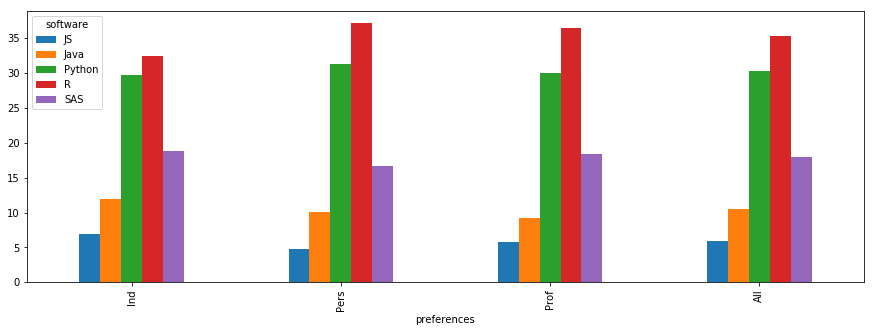

In [17]:
#pd.melt(software_df , id_vars=['RespondentID'], var_name='X', value_name='value')

df_melt = software_df.reset_index().melt(id_vars=['RespondentID'])
#.set_index(['RespondentID', 'variable'])

# new data frame with split value columns 
new = df_melt['variable'].str.split("_", expand = True) 
  
# making separate experience column from new data frame 
df_melt["preferences"]= new[0] 
  
# making separate software column from new data frame 
df_melt["software"]= new[1] 
  
# dropping old variable columns 
df_melt.drop(columns =["variable"], inplace = True) 
 
# summarizing the table by sum and average
df_pivot_sum = pd.pivot_table(df_melt, index= ['preferences'], columns=['software'], values= "value", aggfunc=np.sum, margins=True)
df_pivot_mean = pd.pivot_table(df_melt, index= ['preferences'], columns=['software'], values= "value", aggfunc=np.mean, margins=True)

# On average R was scored the highest and then Python.
df_pivot_mean.loc[:, 'JS':'SAS'].plot(kind= 'bar', figsize=(15, 5))

In [18]:
# derive percentage of total
df_pivot_percent = (df_pivot_sum/df_pivot_sum.loc['All', 'All']).round(3)*100
df_pivot_percent

# apply heatmap for the percentage of total
# sns.heatmap(df_pivot_percent.iloc[:-1,:-1], cmap="YlGnBu", annot=True)

software,JS,Java,Python,R,SAS,All
preferences,,,,,,
Ind,2.3,4.0,9.9,10.8,6.3,33.3
Pers,1.6,3.4,10.4,12.4,5.5,33.3
Prof,1.9,3.1,10.0,12.1,6.2,33.3
All,5.9,10.4,30.4,35.3,18.0,100.0


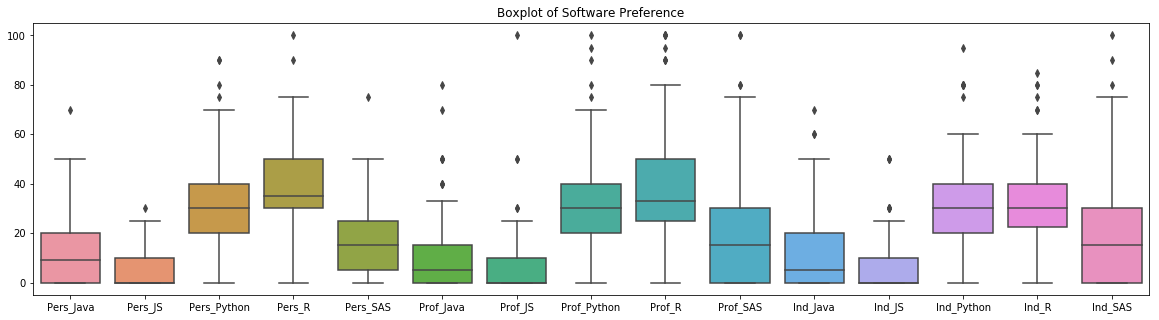

In [19]:
#create data frames of each personal, professional, and industry languages then a boxplot for each
#R ranks the highest

#Box and whisker plot
plt.figure(figsize = (20,5))
sns.boxplot(data = software_df)
plt.title("Boxplot of Software Preference")
plt.show()

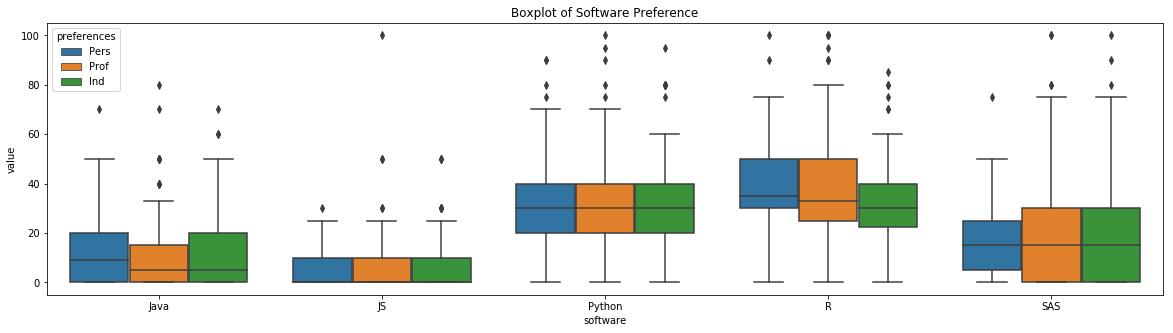

In [20]:
plt.figure(figsize = (20,5))
# sns.boxplot(x = 'experience', y ='value', hue = 'software', data = df_melt)
sns.boxplot(x = 'software', y ='value', hue = 'preferences', data = df_melt)
plt.title("Boxplot of Software Preference")
plt.show()

In [21]:
########### The MSPA Survey has been designed with these objectives in mind:
# Current student software preferences
# Student interest in potential new courses
# Guide software and systems planning for current and future courses
# Guide data science curriculum planning
########### Theories to test:
# 1. Which languages are preferred in general? 
#    A) R is strong, but so is Python. Coupled with 206 users answers "interest in python course," this is a sign.
#       Users have ties across personal, professional, and industry. If strong in one, strong in other opinions.
#       More evenly distributed as an industry standard.
# 2. Is there a difference in trend depending on a number of classes taken or grad date? Especially as it relates to interest.
#    A) Wasn't worth going down this road
# 3. Which classes are taken the most? Is there something that ties them together?
#    A) Recommend possibly merging two Sports classes
#       Look into dropping or re-evaluating Risk Analysis and Web Analytics
# 4. Which elective classes are taken the most? Shows interest and maybe some classes can be dropped from the prog.
# 5. Do people who prefer a language, also take classes in that language? 
# 6. General interest?
#    A) Python for sure! Lukewarm for the rest. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C9BC1ABE0>,
      dtype=object)

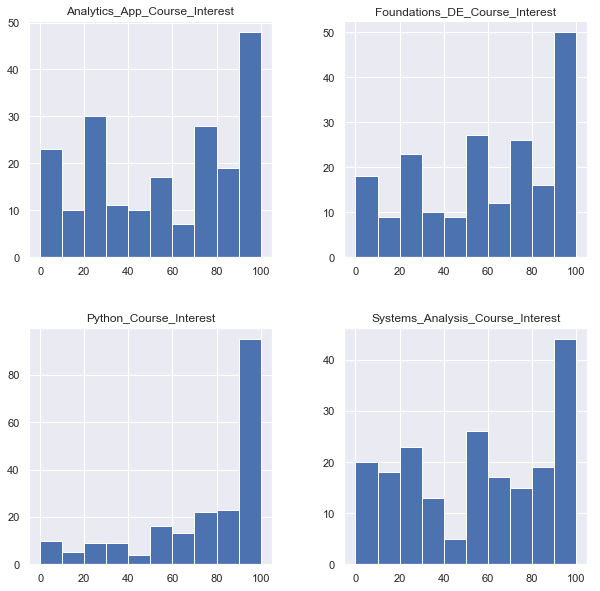

In [22]:
# Most of the repondents have a strong interest in Python course.
sns.set(rc={'figure.figsize':(10,10)})
survey_df.loc[:, 'Python_Course_Interest':'Systems_Analysis_Course_Interest'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C9BF8B8D0>,
      dtype=object)

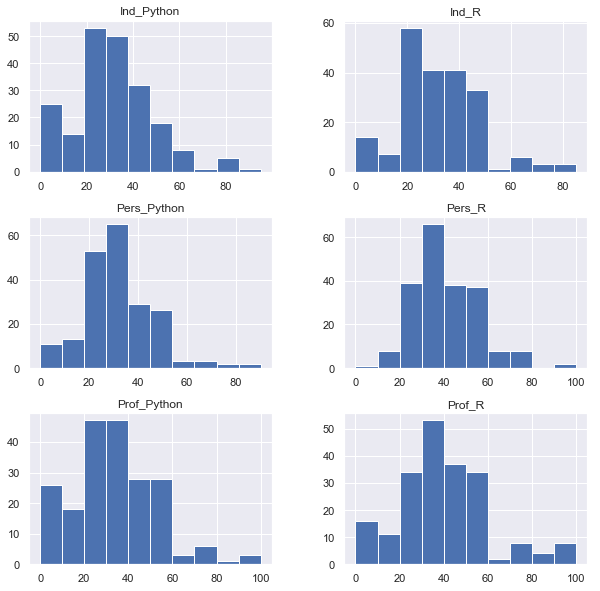

In [23]:
# distribution plots of the students for Python & R: personally and in their industry
sns.set(rc={'figure.figsize':(10,10)})
survey_df.loc[:, ['Pers_Python','Pers_R','Prof_Python','Prof_R','Ind_Python','Ind_R']].hist()

In [24]:
# Course breakdowns
# The courses that have had the least sign-ups are 451 (7 - Risk Analysis R), 456 (6 Sport Perf R), 454 (Web Analytics Python), 457 (Sports Management) 
# Recommend possibly merging two Sports classes
# Look into dropping or re-evaluating Risk Analysis and Web Analytics
# Would be nice to know what's core and what's elective to see which electives are doing the best
courseCt = survey_df.loc[:, 'P400_Python':'P457_R'].sum()
courseCt.sort_values(ascending = False)

P401_R         171
P400_Python    163
P410_SAS       145
P420_Python    127
P411_SAS       113
P413_R          59
P422_R          48
P455_R          30
P450_R          17
P452_Python     13
P453_Python     11
P451_R           7
P456_R           6
P454_R           5
P457_R           4
dtype: int64

The majority of the respondents planned to graduate in 2017 or 2018, and a majority of the respondents have had a chance to take PREDICT 400, 401, and 410 which allowed them to be exposed to Python, R and/or SAS. Through our EDA process using correlation heat maps, we found that students were loyal to a language of choice regardless of individual, professional, or industry-wide preference. The highest preference was given to R, followed closely by Python. SAS, Java, and JavaScript all had low ratings. For individual course analysis, we relied on count distributions to assess which courses were the most and least popular. For a more enhanced study, we would need additional information on which courses were considered ‘core’ and which were ‘electives’ at the time of the study. <br>
R is the most robust language followed closely by Python. When asked, students displayed a keen interest in more Python related courses. In comparison, there was also a generally low interest in SAS, both in Individual ranking and as an Industry standard. I would recommend converting 410 and 411 couyrses from SAS to either Python or R. I also recommend offering more courses in Python, or converting some of the R courses into Python courses, since students feel this something they need to be on par with Industry standards. As for individual courses, the lowest attended courses were Risk Analysis, Web Analytics, Sports Management, and Sports Performance. I'd recommend looking into merging the two Sports courses for a more focused study. The Risk Analysis and Web Analytics could be re-assessed or dropped. Lastly, there was a high correlation between the Analytics Application classes and the Systems Analysis classes. Students also responded with interest when asked about these tracks. My recommendation would be to set these up as electives.